# Evaluación función 1 (univariada)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, interp1d, CubicSpline

Estudio de la performance de distintos esquemas de interpolación en la función 1:

$$
f_1(x) = -0.4 \tanh(50x) + 0.6
\quad \text{con } x \in [-1, 1]
$$


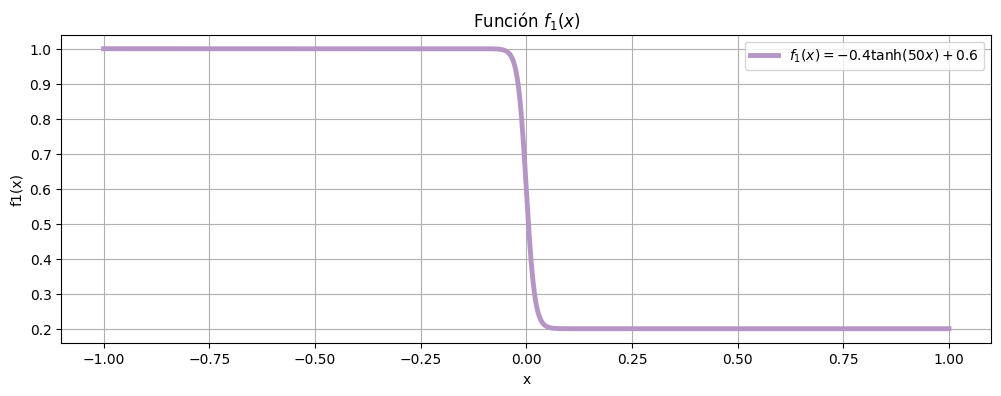

In [19]:
x = np.linspace(-1, 1, 1000)
f1 = -0.4 * np.tanh(50 * x) + 0.6
plt.figure(figsize=(12, 4))
plt.plot(x, f1, label=r'$f_1(x) = -0.4 \tanh(50x) + 0.6$', color='#B495C6',linewidth=3.5)
plt.title("Función $f_1(x)$")
plt.xlabel("x")
plt.ylabel("f1(x)")
plt.grid(True)
plt.legend()
plt.show()

### Observaciones de la función a tomar en cuenta:
Esta función cambia bruscamente alrededor de x=0. Es por eso que es ideal para estudiar problemas donde la interpolación debe capturar transiciones abruptas.

Función f1:

In [3]:
# función f1
def f1(x):
    return -0.4 * np.tanh(50 * x) + 0.6

## 1) Nodos Equiespaciados

Definición de intervalo:

In [4]:
n_points = 20
x_eq = np.linspace(-1, 1, n_points) # puntos equiespaciados
y_eq = f1(x_eq)

# Puntos de evaluación INTERMEDIOS (que no coincidan con los NODOS)
puntosIntermedios = np.linspace(-1, 1, 500)
puntosIntermedios = np.setdiff1d(puntosIntermedios, x_eq)  # Excluir los nodos de interpolación
y_intermedios = f1(puntosIntermedios)

Interpolaciones:

In [5]:
lagrangeInterpol = lagrange(x_eq, y_eq)
linealInterpol = interp1d(x_eq, y_eq, kind='linear')
splineInterpol = CubicSpline(x_eq, y_eq)

In [6]:
# Puntos nuevos para la evaluación
y_linear_intermedios = linealInterpol(puntosIntermedios)
y_lagrange_intermedios = lagrangeInterpol(puntosIntermedios)
y_spline_intermedios = splineInterpol(puntosIntermedios)

#### Representaciones visuales:

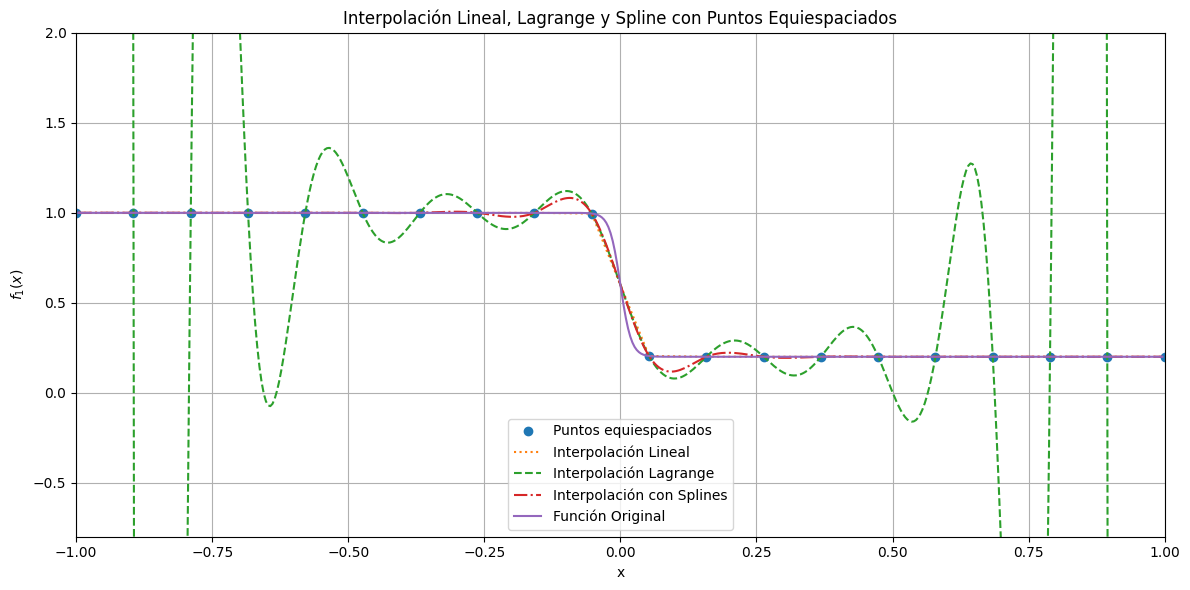

In [7]:
""" GRAFICO FUNCIÓN E INTERPOLACIONES """
plt.figure(figsize=(12, 6))

plt.plot(x_eq, y_eq, 'o', label='Puntos equiespaciados')
plt.plot(puntosIntermedios, y_linear_intermedios, ':', label='Interpolación Lineal')
plt.plot(puntosIntermedios, y_lagrange_intermedios, '--', label='Interpolación Lagrange')
plt.plot(puntosIntermedios, y_spline_intermedios, '-.', label='Interpolación con Splines')
plt.plot(puntosIntermedios, y_intermedios, '-', label='Función Original')
plt.legend()
plt.title('Interpolación Lineal, Lagrange y Spline con Puntos Equiespaciados')
plt.xlabel('x')
plt.ylabel('$f_1(x)$')
plt.grid(True)

plt.ylim(min(y_intermedios) - 1, max(y_intermedios) + 1)
plt.xlim(-1, 1)

plt.tight_layout()
plt.show()

Cuantificación de los errores:

In [8]:
# Errores relativos
error_lineal = np.abs(y_intermedios - y_linear_intermedios) / np.abs(y_intermedios)
error_lagrange = np.abs(y_intermedios - y_lagrange_intermedios) / np.abs(y_intermedios)
error_spline = np.abs(y_intermedios - y_spline_intermedios) / np.abs(y_intermedios)

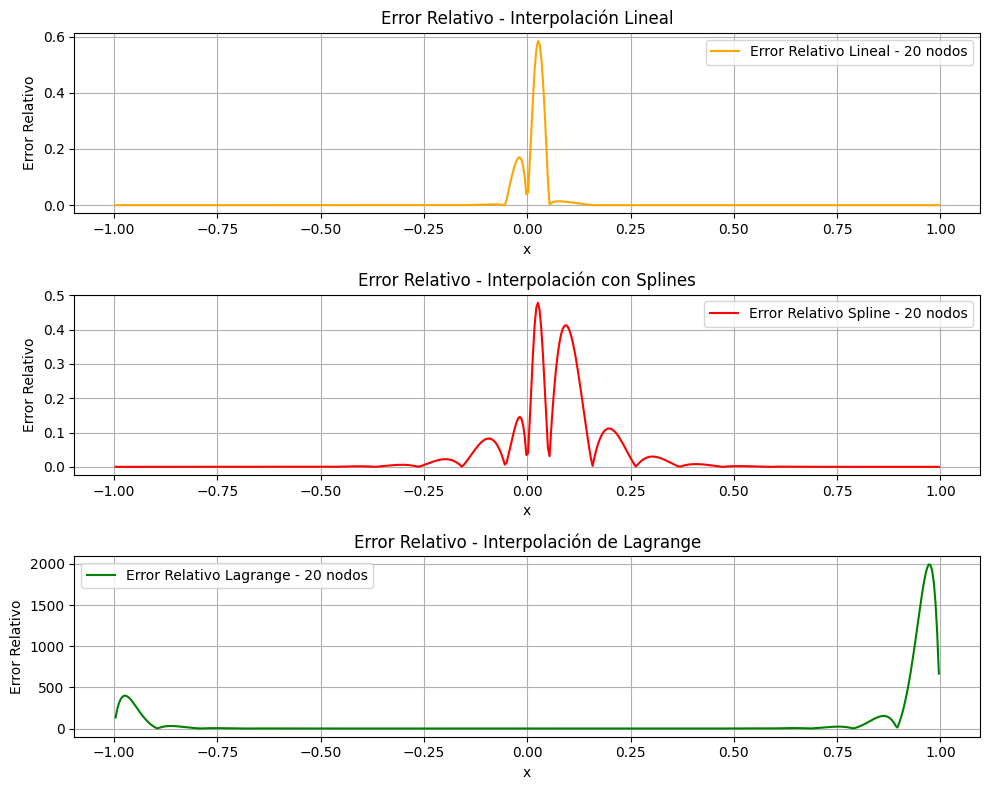

In [9]:
""" GRÁFICOS DE ERRORES RELATIVOS """

plt.figure(figsize=(10, 8))

# LINEAL
plt.subplot(3, 1, 1)
plt.plot(puntosIntermedios, error_lineal, color='orange', label=f'Error Relativo Lineal - {n_points} nodos')
plt.title('Error Relativo - Interpolación Lineal')
plt.xlabel('x')
plt.ylabel('Error Relativo')
plt.grid(True)
plt.legend()

# LAGRANGE
plt.subplot(3, 1, 3)
plt.plot(puntosIntermedios, error_lagrange, color='green', label=f'Error Relativo Lagrange - {n_points} nodos')
plt.title('Error Relativo - Interpolación de Lagrange')
plt.xlabel('x')
plt.ylabel('Error Relativo')
plt.grid(True)
plt.legend()

# SPLINES
plt.subplot(3, 1, 2)
plt.plot(puntosIntermedios, error_spline, color='red', label=f'Error Relativo Spline - {n_points} nodos')
plt.title('Error Relativo - Interpolación con Splines')
plt.xlabel('x')
plt.ylabel('Error Relativo')
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()

In [10]:
#nuevo escenario con nuevos puntos intermedios para evaluar errores:
nodos = list(range(2, 100))

errores_lineal = []
errores_lagrange = []
errores_spline = []

errores_lineal2 = []
errores_lagrange2 = []
errores_spline2 = []

puntosIntermedios = np.linspace(0, 1, 500)
y_intermedios = f1(puntosIntermedios)

for n_points in nodos:
    i = np.arange(n_points)
    x_chebyshev = 0.5 * (1 + np.cos((2 * i + 1) / (2 * n_points) * np.pi)) 
    y_chebyshev = f1(x_chebyshev)
    
    sorted_indices = np.argsort(x_chebyshev)
    x_chebyshev = x_chebyshev[sorted_indices]
    y_chebyshev = y_chebyshev[sorted_indices]
    
    lineal_interpol = interp1d(x_chebyshev, y_chebyshev, kind='linear', bounds_error=False, fill_value="extrapolate")
    lagrange_interpol = lagrange(x_chebyshev, y_chebyshev)
    spline_interpol = CubicSpline(x_chebyshev, y_chebyshev, extrapolate=True)
    
    y_lineal_intermedios = lineal_interpol(puntosIntermedios)
    y_lagrange_intermedios = lagrange_interpol(puntosIntermedios)
    y_spline_intermedios = spline_interpol(puntosIntermedios)
    

    error_lineal = np.abs(y_intermedios - y_lineal_intermedios) 
    error_lagrange = np.abs(y_intermedios - y_lagrange_intermedios)
    error_spline = np.abs(y_intermedios - y_spline_intermedios) 
    

    errores_lineal.append(np.median(error_lineal))
    errores_lagrange.append(np.median(error_lagrange))
    errores_spline.append(np.median(error_spline))

    errores_lineal2.append(np.mean(error_lineal))
    errores_lagrange2.append(np.mean(error_lagrange))
    errores_spline2.append(np.mean(error_spline))

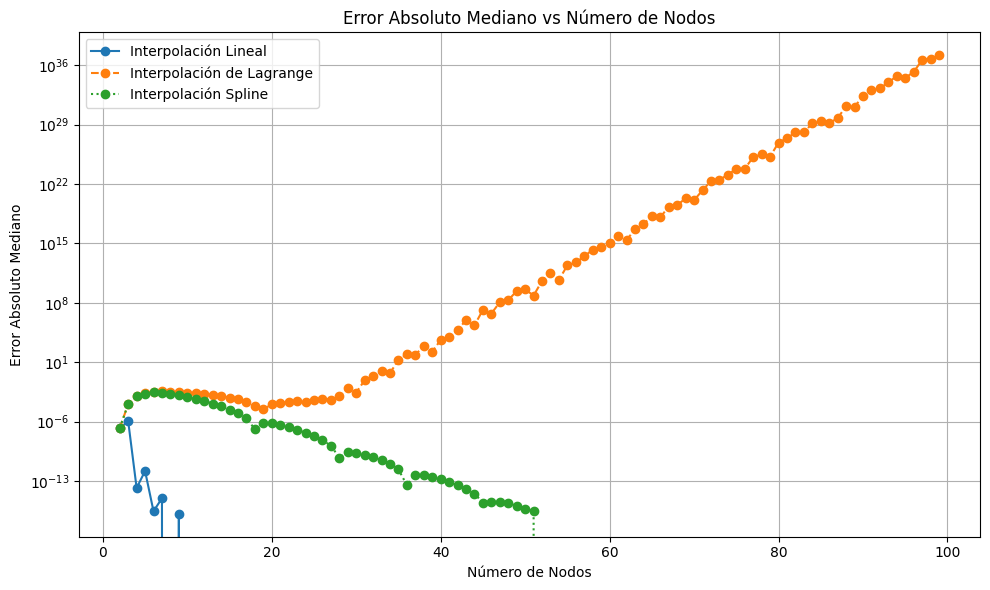

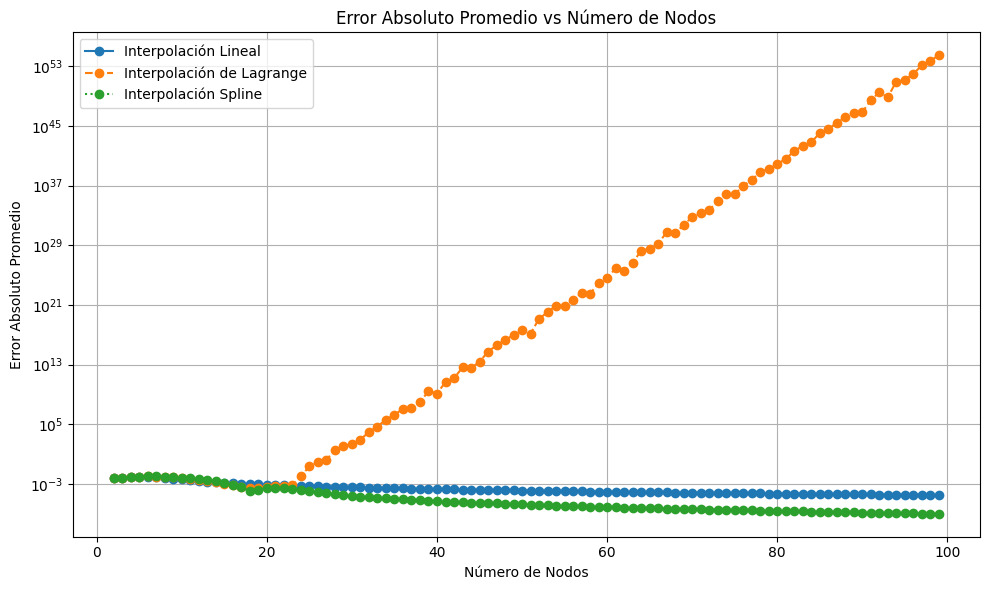

In [11]:
""" GRÁFICO EVOLUCIÓN ERROR ABSOLUTO, MEDIANO Y PROMEDIO """

#mediano
plt.figure(figsize=(10, 6))
plt.plot(nodos, errores_lineal, label='Interpolación Lineal', marker='o', linestyle='-')
plt.plot(nodos, errores_lagrange, label='Interpolación de Lagrange', marker='o', linestyle='--')
plt.plot(nodos, errores_spline, label='Interpolación Spline', marker='o', linestyle=':')
plt.xlabel('Número de Nodos')
plt.ylabel('Error Absoluto Mediano')
plt.title('Error Absoluto Mediano vs Número de Nodos')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#promedio
plt.figure(figsize=(10, 6))
plt.plot(nodos, errores_lineal2, label='Interpolación Lineal', marker='o', linestyle='-')
plt.plot(nodos, errores_lagrange2, label='Interpolación de Lagrange', marker='o', linestyle='--')
plt.plot(nodos, errores_spline2, label='Interpolación Spline', marker='o', linestyle=':')
plt.xlabel('Número de Nodos')
plt.ylabel('Error Absoluto Promedio')
plt.title('Error Absoluto Promedio vs Número de Nodos')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2) Nodos Chebyshev

Distribución de los puntos:

In [12]:
n_points = 20 
i = np.arange(n_points)
x_chebyshev = np.cos((2 * i + 1) / (2 * n_points) * np.pi)
y_chebyshev = f1(x_chebyshev) # puntos de Chebyshev

sorted_indices = np.argsort(x_chebyshev)
x_chebyshev = x_chebyshev[sorted_indices]
y_chebyshev = y_chebyshev[sorted_indices]

puntosIntermedios = np.linspace(-1, 1, 500)
puntosIntermedios = np.setdiff1d(puntosIntermedios, x_chebyshev)  # Excluir los nodos de interpolación

min_x = x_chebyshev[0]
max_x = x_chebyshev[-1]
puntosIntermedios = puntosIntermedios[(puntosIntermedios > min_x) & (puntosIntermedios < max_x)]
y_intermedios = f1(puntosIntermedios)

Interpolaciones:

In [13]:
lagrangeInterpol = lagrange(x_chebyshev, y_chebyshev)
linealInterpol = interp1d(x_chebyshev, y_chebyshev, kind='linear')
splineInterpol = CubicSpline(x_chebyshev, y_chebyshev)

y_lagrange_intermedios = lagrangeInterpol(puntosIntermedios)
y_lineal_intermedios = linealInterpol(puntosIntermedios)
y_spline_intermedios = splineInterpol(puntosIntermedios)

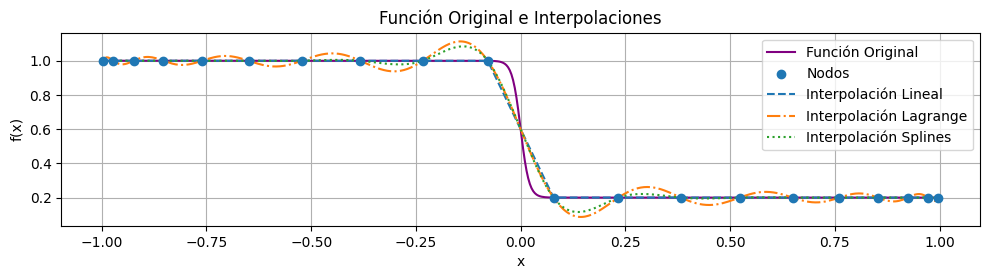

In [14]:
""" GRÁFICO FUNCIÓN E INTERPOLACIONES """
plt.figure(figsize=(10, 10))

plt.subplot(4, 1, 1)
plt.plot(puntosIntermedios, y_intermedios, '-', color = 'purple', label='Función Original')
plt.scatter(x_chebyshev, y_chebyshev, label='Nodos', zorder=5)
plt.plot(puntosIntermedios, y_lineal_intermedios, '--', label='Interpolación Lineal')
plt.plot(puntosIntermedios, y_lagrange_intermedios, '-.', label='Interpolación Lagrange')
plt.plot(puntosIntermedios, y_spline_intermedios, ':', label='Interpolación Splines')

plt.title('Función Original e Interpolaciones')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Cálculo de los errores:

In [15]:
error_rel_lineal = np.abs(y_intermedios - y_lineal_intermedios) / np.abs(y_intermedios)
error_rel_lagrange = np.abs(y_intermedios - y_lagrange_intermedios) / np.abs(y_intermedios)
error_rel_spline = np.abs(y_intermedios - y_spline_intermedios) / np.abs(y_intermedios)

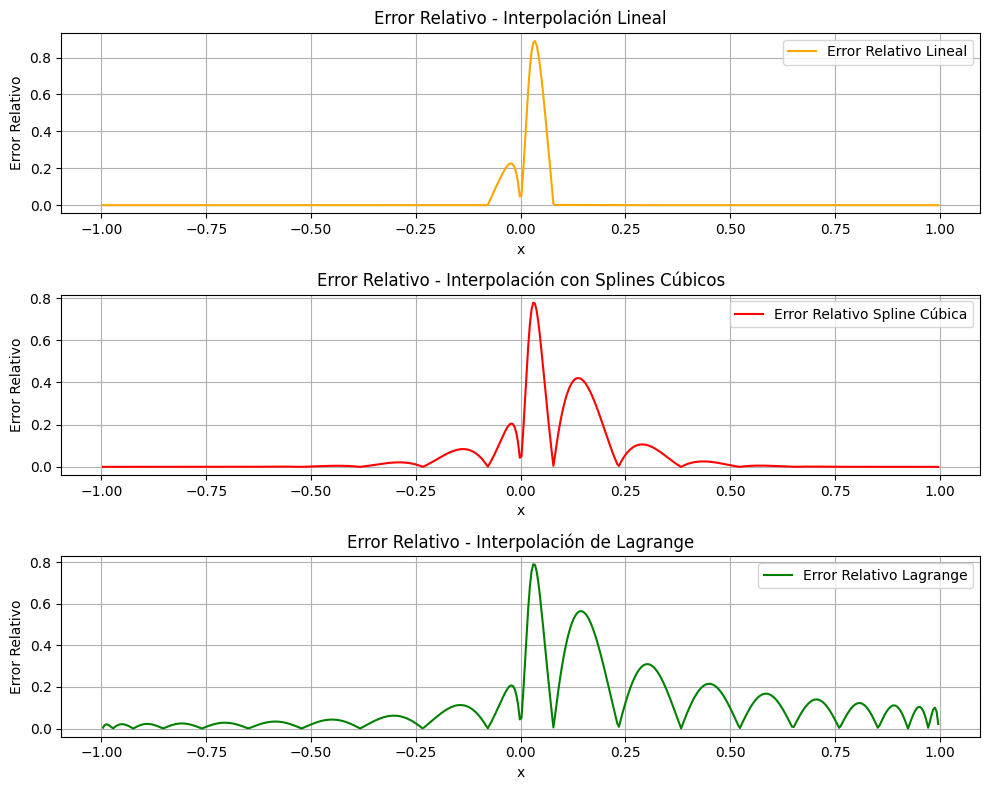

In [16]:
""" GRÁFICOS DE ERRORES RELATIVOS """
plt.figure(figsize=(10, 8))

#interpolación lineal
plt.subplot(3, 1, 1)
plt.plot(puntosIntermedios, error_rel_lineal, color='orange', label='Error Relativo Lineal')
plt.title('Error Relativo - Interpolación Lineal')
plt.xlabel('x')
plt.ylabel('Error Relativo')
plt.grid(True)
plt.legend()

#interpolación spline cúbica
plt.subplot(3, 1, 2)
plt.plot(puntosIntermedios, error_rel_spline, color='red', label='Error Relativo Spline Cúbica')
plt.title('Error Relativo - Interpolación con Splines Cúbicos')
plt.xlabel('x')
plt.ylabel('Error Relativo')
plt.grid(True)
plt.legend()

#interpolación de Lagrange
plt.subplot(3, 1, 3)
plt.plot(puntosIntermedios, error_rel_lagrange, color='green', label='Error Relativo Lagrange')
plt.title('Error Relativo - Interpolación de Lagrange')
plt.xlabel('x')
plt.ylabel('Error Relativo')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
#nuevo escenario con nuevos puntos intermedios para evaluar errores: (para poder modificar parametros sin condicionar lo anterior)
nodos = list(range(2, 100))

errores_lineal = []
errores_lagrange = []
errores_spline = []

errores_lineal2 = []
errores_lagrange2 = []
errores_spline2 = []


puntosIntermedios = np.linspace(-1, 1, 500)
y_intermedios = f1(puntosIntermedios)

for n_points in nodos:
    i = np.arange(n_points)
    x_chebyshev = np.cos((2 * i + 1) / (2 * n_points) * np.pi)
    y_chebyshev = f1(x_chebyshev)
    
    sorted_indices = np.argsort(x_chebyshev)
    x_chebyshev = x_chebyshev[sorted_indices]
    y_chebyshev = y_chebyshev[sorted_indices]
    
    lineal_interpol = interp1d(x_chebyshev, y_chebyshev, kind='linear', bounds_error=False, fill_value="extrapolate")
    lagrange_interpol = lagrange(x_chebyshev, y_chebyshev)
    spline_interpol = CubicSpline(x_chebyshev, y_chebyshev, extrapolate=True)
    
    y_lineal_intermedios = lineal_interpol(puntosIntermedios)
    y_lagrange_intermedios = lagrange_interpol(puntosIntermedios)
    y_spline_intermedios = spline_interpol(puntosIntermedios)
    
    error_lineal = np.abs(y_intermedios - y_lineal_intermedios) 
    error_lagrange = np.abs(y_intermedios - y_lagrange_intermedios) 
    error_spline = np.abs(y_intermedios - y_spline_intermedios) 
    
    errores_lineal.append(np.median(error_lineal))
    errores_lagrange.append(np.median(error_lagrange))
    errores_spline.append(np.median(error_spline))

    errores_lineal2.append(np.mean(error_lineal))
    errores_lagrange2.append(np.mean(error_lagrange))
    errores_spline2.append(np.mean(error_spline))


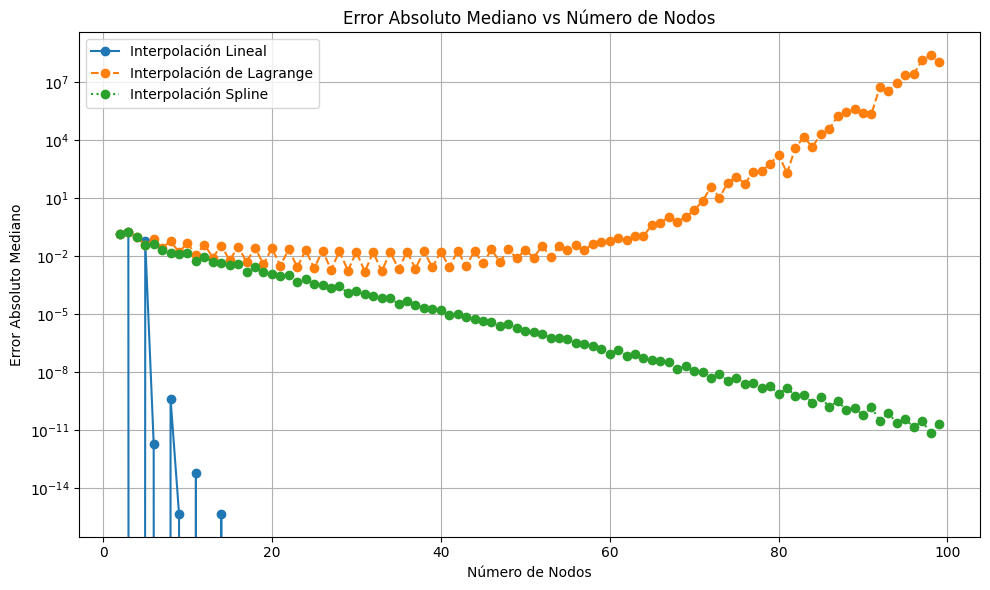

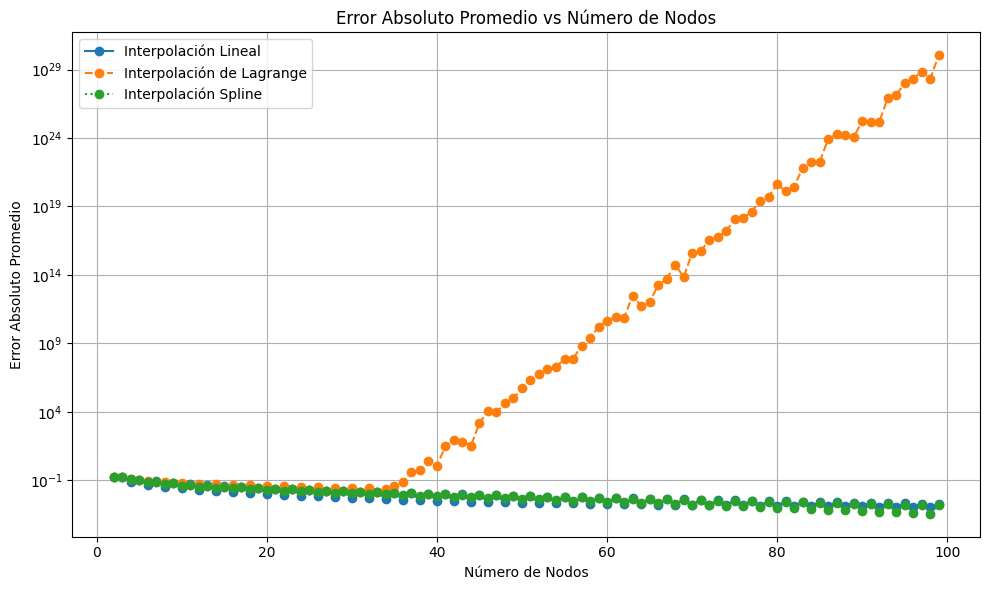

In [18]:
""" GRÁFICO EVOLUCIÓN ERROR ABSOLUTO, MEDIANO Y PROMEDIO """
#mediano
plt.figure(figsize=(10, 6))
plt.plot(nodos, errores_lineal, label='Interpolación Lineal', marker='o', linestyle='-')
plt.plot(nodos, errores_lagrange, label='Interpolación de Lagrange', marker='o', linestyle='--')
plt.plot(nodos, errores_spline, label='Interpolación Spline', marker='o', linestyle=':')
plt.xlabel('Número de Nodos')
plt.ylabel('Error Absoluto Mediano')
plt.title('Error Absoluto Mediano vs Número de Nodos')
plt.yscale('log') 
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#promedio
plt.figure(figsize=(10, 6))
plt.plot(nodos, errores_lineal2, label='Interpolación Lineal', marker='o', linestyle='-')
plt.plot(nodos, errores_lagrange2, label='Interpolación de Lagrange', marker='o', linestyle='--')
plt.plot(nodos, errores_spline2, label='Interpolación Spline', marker='o', linestyle=':')
plt.xlabel('Número de Nodos')
plt.ylabel('Error Absoluto Promedio')
plt.title('Error Absoluto Promedio vs Número de Nodos')
plt.yscale('log') 
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()